### Required imports

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from itertools import product

In [2]:
import warnings
#To ignore all warnings in model output
warnings.filterwarnings("ignore")

### Basic Statistics

In [3]:
jpm = pd.read_excel('JPM Statistics and Regression Analysis.xlsx', usecols=[0,5], parse_dates=True)
jpm['return']= np.log(jpm['Adj Close']/jpm['Adj Close'].shift(1))
jpm.dropna(inplace=True)
jpm.head()

,Date,Adj Close,return
1,2018-02-02,106.061226,-0.022411
2,2018-02-05,100.975327,-0.049140
3,2018-02-06,104.047287,0.029969
4,2018-02-07,104.752632,0.006756
5,2018-02-08,100.121498,-0.045217


In [4]:
average_price = np.mean(jpm['Adj Close'])
stock_volatility = np.std(jpm['return'].dropna())
average_price
stock_volatility

103.55366909210528

0.01438700397839891

### Linear Regression

In [5]:
SP = pd.read_excel('JPM Statistics and Regression Analysis.xlsx',sheet_name='Regression Analysis', usecols=[0,2], parse_dates=True)
SP['return']= np.log(SP['S&P 500 Adj Close Price (X)']/SP['S&P 500 Adj Close Price (X)'].shift(1))
SP.dropna(inplace=True)
SP.head()

,Date,S&P 500 Adj Close Price (X),return
1,2018-02-02,2762.129883,-0.021437
2,2018-02-05,2648.939941,-0.041843
3,2018-02-06,2695.139893,0.017291
4,2018-02-07,2681.659912,-0.005014
5,2018-02-08,2581.000000,-0.038259


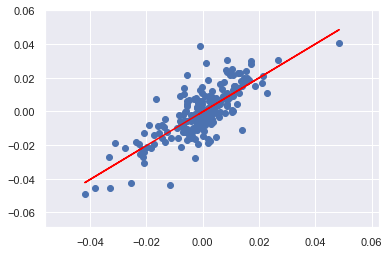

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

X = SP['return']
y = jpm['return']

model.fit(X[:, np.newaxis], y)

yfit = model.predict(X[:, np.newaxis])
fig, ax1 = plt.subplots()
plt.scatter(X, y)
plt.plot(X, yfit, color='red');

In [7]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)
print("R squared: ", model.score(X[:, np.newaxis],y))

Model slope:     1.0046023652612033
Model intercept: -0.00018946070310245768
R squared:  0.6010890997528382


### Linear Regression II

In [8]:
import statsmodels.api as sm

In [9]:
x = sm.add_constant(X)

In [10]:
model = sm.OLS(y, x)

In [11]:
results = model.fit()

In [12]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     340.5
Date:                Sun, 27 Sep 2020   Prob (F-statistic):           5.40e-47
Time:                        17:19:59   Log-Likelihood:                 748.30
No. Observations:                 228   AIC:                            -1493.
Df Residuals:                     226   BIC:                            -1486.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.313      0.7

### Univariate Time Series

In [13]:
home_price = pd.read_excel("CSUSHPISA.xls", skiprows=10, index_col='observation_date', parse_dates=True)
home_price = home_price.asfreq('MS')
home_price.tail()
home_price.index

,CSUSHPISA
observation_date,
2020-02-01,215.702
2020-03-01,216.731
2020-04-01,217.597
2020-05-01,217.691
2020-06-01,218.058


DatetimeIndex(['1987-01-01', '1987-02-01', '1987-03-01', '1987-04-01',
               '1987-05-01', '1987-06-01', '1987-07-01', '1987-08-01',
               '1987-09-01', '1987-10-01',
               ...
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01'],
              dtype='datetime64[ns]', name='observation_date', length=402, freq='MS')

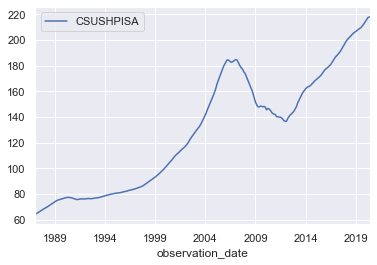

In [14]:
home_price.plot()

### Forecast S&P/Case-Shvalue_countsU.S. National Home Price Index using an ARMA model.

#### Identify the best order =`(p,q)` for our ARMA model

In [15]:
order_aic_bic =[]
# Loop over AR order
for p in range(4):
    # Loop over MA order
    for q in range(4):
        # Fit model
        model = SARIMAX(home_price, order=(p,0,q))
        try:
            results = model.fit()
        except:
            pass
        # print the model order and the AIC/BIC values
        #print(p, q, results.aic, results.bic)
        # Add order and scores to list
        order_aic_bic.append((p, q, results.aic, results.bic))
# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p','q', 'aic', 'bic'])

# Sort the order_df by AIC/BIC
order_df.sort_values('aic')

# Sort by BIC
order_df.sort_values('bic')

,p,q,aic,bic
13,3,1,50.721073,70.703334
14,3,2,56.131980,80.110693
15,3,3,61.047322,89.022487
10,2,2,61.914472,81.896733
8,2,0,74.893293,86.882650
12,3,0,219.384372,235.370180
7,1,3,293.430175,313.412436
6,1,2,384.680624,400.666432
11,2,3,386.657915,410.636628
5,1,1,637.481470,649.470826


,p,q,aic,bic
13,3,1,50.721073,70.703334
14,3,2,56.131980,80.110693
10,2,2,61.914472,81.896733
8,2,0,74.893293,86.882650
15,3,3,61.047322,89.022487
12,3,0,219.384372,235.370180
7,1,3,293.430175,313.412436
6,1,2,384.680624,400.666432
11,2,3,386.657915,410.636628
5,1,1,637.481470,649.470826


#### Select the best model with the chosen order `(p,q)`

In [16]:
# create ARMA model
from statsmodels.tsa.arima_model import ARMA
# Instantiate model object
model = SARIMAX(home_price, order=(3,0,1))
# Fit model
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              CSUSHPISA   No. Observations:                  402
Model:               SARIMAX(3, 0, 1)   Log Likelihood                 -20.361
Date:                Sun, 27 Sep 2020   AIC                             50.721
Time:                        17:20:15   BIC                             70.703
Sample:                    01-01-1987   HQIC                            58.633
                         - 06-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9608      0.017     56.617      0.000       0.928       0.994
ar.L2          0.9880      0.019     52.535      0.000       0.951       1.025
ar.L3         -0.9489      0.014    -69.699      0.000      -0.976      -0.922
ma.L1          0.9747      0.018     54.226      0.000       0.940       1.010
sigma2         0.0622      0.002     28.468      0.000       0.058       0.066
===================================================================================
Ljung-Box (Q):                      131.81   Jarque-Bera (JB):              2646.34
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              26.97   Skew:                             1.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Make out-of-sample predictions

In [17]:
# Make out of sample forecast
forecast = results.get_forecast(steps=24)

#Determine mean forecast
mean_forecast = forecast.predicted_mean

mean_forecast

2020-07-01    218.377817
2020-08-01    218.683247
2020-09-01    218.944426
2020-10-01    219.193648
2020-11-01    219.401311
                 ...    
2022-02-01    220.182246
2022-03-01    220.100695
2022-04-01    220.021048
2022-05-01    219.916239
2022-06-01    219.814235
Freq: MS, Length: 24, dtype: float64

### Implement the Augmented Dickey-Fuller Test for checking the existence of a unit root in Case-Shiller Index series.

In [18]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(home_price['CSUSHPISA'])
adf

(-0.43881777681924117,
 0.9034130797196441,
 14,
 387,
 {'1%': -3.447360865754795,
  '5%': -2.8690374364690445,
  '10%': -2.5707639493486636},
 11.414184490645198)

In [19]:
f'The t-value {adf[0]} is greater than the critical values {adf[4].values()} at significance levels  {adf[4].keys()} , so we cannot reject the null hypothesis of unit root'

"The t-value -0.43881777681924117 is greater than the critical values dict_values([-3.447360865754795, -2.8690374364690445, -2.5707639493486636]) at significance levels  dict_keys(['1%', '5%', '10%']) , so we cannot reject the null hypothesis of unit root"

### Implement an ARIMA(p,d,q) model. Determine p, d, q using Information Criterion or Box-Jenkins methodology. Comment the results.

##### Transform and difference of the data to make the data stationary

In [20]:
y_stationary = np.log(home_price['CSUSHPISA']).diff().dropna()

##### Helper functions to test for stationarity

In [21]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    return kpss_output


In [22]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

In [23]:
kpss_test(y_stationary)
adf_test(y_stationary)

Results of KPSS Test:


Test Statistic            0.11609
p-value                   0.10000
Lags Used                17.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64

Results of Dickey-Fuller Test:


Test Statistic                  -2.752557
p-value                          0.065377
#Lags Used                      13.000000
Number of Observations Used    387.000000
Critical Value (1%)             -3.447361
Critical Value (5%)             -2.869037
Critical Value (10%)            -2.570764
dtype: float64

##### Both KPSS and ADFuller show that the log transform and first difference make the house price index stationary

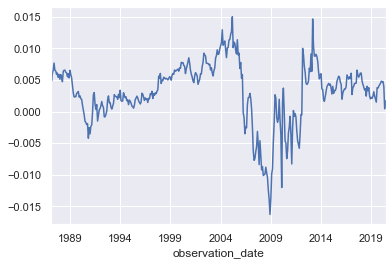

In [24]:
y_stationary.plot()

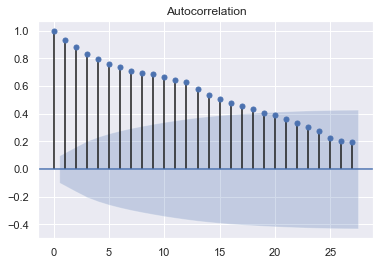

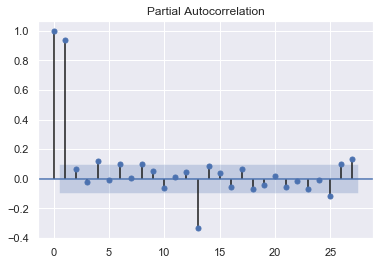

In [25]:
plot_acf(y_stationary);
plot_pacf(y_stationary, alpha=.05);

#### Determine the best order `(p,d,q)`

In [26]:
order_aic_bic =[]
# Loop over AR, Integration and MA order
for p,d,q in product(range(4), repeat=3):
    
    # Fit model
    model = SARIMAX(np.log(home_price), order=(p,d,q))
    try:
        results = model.fit()
    except:
        pass
    # print the model order and the AIC/BIC values
    #print(p, q, results.aic, results.bic)
    # Add order and scores to list
    order_aic_bic.append((p, d, q, results.aic, results.bic))
# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p','d','q', 'aic', 'bic'])

# Sort by AIC
order_df.sort_values('aic')

# Sort by BIC
order_df.sort_values('bic')

,p,d,q,aic,bic
55,3,1,3,-3975.326469,-3947.368739
23,1,1,3,-3974.193567,-3954.223760
20,1,1,0,-3971.989619,-3964.001696
39,2,1,3,-3971.905406,-3947.941637
36,2,1,0,-3971.732572,-3959.750688
...,...,...,...,...,...
49,3,0,1,-2420.144219,-2400.161959
3,0,0,3,791.965741,807.951549
2,0,0,2,1313.840638,1325.829994
1,0,0,1,2405.064910,2409.061363


,p,d,q,aic,bic
20,1,1,0,-3971.989619,-3964.001696
36,2,1,0,-3971.732572,-3959.750688
21,1,1,1,-3971.686807,-3959.704923
37,2,1,1,-3970.316561,-3954.340715
23,1,1,3,-3974.193567,-3954.223760
...,...,...,...,...,...
49,3,0,1,-2420.144219,-2400.161959
3,0,0,3,791.965741,807.951549
2,0,0,2,1313.840638,1325.829994
1,0,0,1,2405.064910,2409.061363


#### Make in-sample prediction (one-step ahead)

##### The best order appear to be `order=(3,1,3)`, let's use that

In [27]:
model = SARIMAX(np.log(home_price), order=(3,1,3))
results = model.fit()
results.summary()
forecast_log = results.get_prediction(start=-24).predicted_mean

#forecast for the original data
forecast = np.exp(forecast_log)
forecast

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              CSUSHPISA   No. Observations:                  402
Model:               SARIMAX(3, 1, 3)   Log Likelihood                1994.663
Date:                Sun, 27 Sep 2020   AIC                          -3975.326
Time:                        17:21:06   BIC                          -3947.369
Sample:                    01-01-1987   HQIC                         -3964.256
                         - 06-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1188      0.107     -1.107      0.268      -0.329       0.091
ar.L2          0.5508      0.053     10.332      0.000       0.446       0.655
ar.L3          0.5183      0.091      5.710      0.000       0.340       0.696
ma.L1          1.0409      0.102     10.231      0.000       0.842       1.240
ma.L2          0.4227      0.095      4.442      0.000       0.236       0.609
ma.L3         -0.2202      0.034     -6.448      0.000      -0.287      -0.153
sigma2      2.759e-06   1.01e-07     27.194      0.000    2.56e-06    2.96e-06
===================================================================================
Ljung-Box (Q):                      121.85   Jarque-Bera (JB):              2625.39
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.20   Skew:                             1.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

observation_date
2018-07-01    203.117070
2018-08-01    203.456981
2018-09-01    204.461249
2018-10-01    205.115783
2018-11-01    205.842248
                 ...    
2020-02-01    215.675983
2020-03-01    216.738188
2020-04-01    217.688058
2020-05-01    218.494528
2020-06-01    217.823392
Freq: MS, Length: 24, dtype: float64

#### Create diagnostic plots

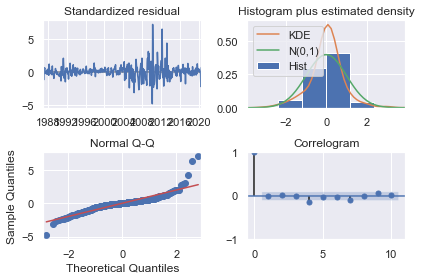

In [28]:
# Create the 4 diagostics plots
results.plot_diagnostics();
plt.tight_layout()
plt.show();